# <center> TASK 'B'

In [3]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
from sklearn.metrics import accuracy_score as accuracy
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [7]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [8]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [9]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [5]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [10]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [11]:
data.corr(method='pearson')

,f1,f2,f3,y
f1,1.000000,0.065468,0.123589,0.067172
f2,0.065468,1.000000,-0.055561,-0.017944
f3,0.123589,-0.055561,1.000000,0.839060
y,0.067172,-0.017944,0.839060,1.000000


# Feature wise correlation does not show huge importance, since all the correlation(feature1,feature2) are below 0.123, So the features are not CORRELATED

In [12]:
y=data['y'].values
x=data.drop('y',axis=1)

In [13]:
x.head(3)

,f1,f2,f3
0,-195.871045,-14843.084171,5.532140
1,-1217.183964,-4068.124621,4.416082
2,9.138451,4413.412028,0.425317


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

# <center> TASK 1: WITHOUT STANDARDISATION

# LOGISTIC REGRESSION

In [30]:

clf = linear_model.SGDClassifier(eta0=0.001, alpha=0.001, loss='log', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')
clf.fit(x,y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=15, shuffle=True, tol=0.1, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [31]:
# FEATURE IMPORTANCES(weight of features f1,f2 and f3)
clf.coef_

array([[  434.01153812, -1772.80844732,  1161.33189074]])

# f3(importance)>> f1(importance)>> f2(importance),so f3 is the most important feature

# SVM

In [32]:
clf = linear_model.SGDClassifier(eta0=0.001, alpha=0.001, loss='hinge', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')
clf.fit(x,y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=15, shuffle=True, tol=0.1,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
# FEATURE IMPORTANCES(weight of features f1,f2 and f3)
clf.coef_

array([[-158.31460067, -338.65634463, 1168.26897866]])

# f3(importance)>> f1(importance)>> f2(importance),so f3 is the most important feature

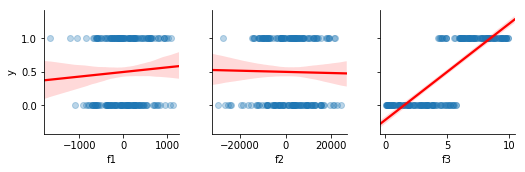

In [86]:
import seaborn as sns
sns.pairplot(data, 
                  y_vars=['y'],
                  x_vars=["f1","f2",'f3'],
             kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})
plt.show()

##  PAIR PLOT shows that the feature F3 has linear relationship  with 'y', while other features f1 and f2 does not. So, f3 helps to bulid the linear model more effectively, thus it has more weight than other features

## FEATURE f1 has little linear relationship with 'y' compared to f3 , while f2 has no linear relationship, so f1 is more important than f2 in building a linear model

# CONCLUSION:
 ## f3(importance)>> f1(importance)>> f2(importance),so f3 is the most important feature

# <center> TASK 2: DATA STANDARDISATION

In [69]:
# standard deviation of features before standardisation
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [80]:
y=data['y'].values
data=data.drop('y',axis=1)

data=(data-data.mean())/(data.std())

In [71]:
# standard deviation of features after standardisation
data.std()

f1    1.0
f2    1.0
f3    1.0
dtype: float64

In [82]:
data.head(5)

,f1,f2,f3,y
0,-0.422067,-1.551708,0.181196,1.0
1,-2.514085,-0.515995,-0.200146,1.0
2,-0.002134,0.299269,-1.563735,0.0
3,0.724391,1.362511,-1.335214,0.0
4,-1.595658,-0.890469,-1.069923,0.0


In [48]:
data.corr(method='pearson')

,f1,f2,f3,y
f1,1.000000,0.065468,0.123589,0.067172
f2,0.065468,1.000000,-0.055561,-0.017944
f3,0.123589,-0.055561,1.000000,0.839060
y,0.067172,-0.017944,0.839060,1.000000


# Feature wise correlation(after standardisation) does not show HUGE CORRELATION  between features, since all the correlation(feature1,feature2,feature3) are below 0.123, So the features are not  highly CORRELATED

In [50]:
x.head(3)

,f1,f2,f3
0,-0.422067,-1.551708,0.181196
1,-2.514085,-0.515995,-0.200146
2,-0.002134,0.299269,-1.563735


# LOGISTIC REGRESSION

In [26]:
clf = linear_model.SGDClassifier(eta0=0.001, alpha=0.001, loss='log', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')
clf.fit(x,y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=15, shuffle=True, tol=0.1, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [27]:
# FEATURE IMPORTANCES(weight of features f1,f2 and f3)
clf.coef_

array([[  434.01153812, -1772.80844732,  1161.33189074]])

# f3(importance)>> f1(importance)>> f2(importance),so f3 is the most important feature

# SVM

In [28]:
clf = linear_model.SGDClassifier(eta0=0.001, alpha=0.001, loss='hinge', random_state=15, penalty='l2', 
                                         tol=1e-1, learning_rate='optimal')
clf.fit(x,y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=15, shuffle=True, tol=0.1,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
# FEATURE IMPORTANCES(weight of features f1,f2 and f3)
clf.coef_

array([[-158.31460067, -338.65634463, 1168.26897866]])

# f3(importance)>> f1(importance)>> f2(importance),so f3 is the most important feature

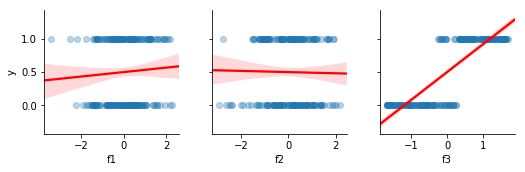

In [83]:
import seaborn as sns
sns.pairplot(data, 
                  y_vars=['y'],
                  x_vars=["f1","f2",'f3'],
             kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})
plt.show()

# The pair plot is same as the pair plot obtained before standardisation

## PAIR PLOT shows that the feature F3 has linear relationship  with 'y', while other features f1 and f2 does not. So, f3 helps to bulid the linear model more effectively, thus it has more weight than other features

## FEATURE f1 has little linear relationship with 'y' compared to f3 , while f2 has no linear relationship, so f1 is more important than f2 in building a linear model

# CONCLUSION:
# f3(importance)>> f1(importance)>> f2(importance),so f3 is the most important feature